# A. Basics of Linear Algebra to Solve Systems of Equations

**Goals**
- Understand how to represent a linear system in matrix form $A\mathbf{x}=\mathbf{b}$.
- Diagnose when a system has a unique solution, infinitely many solutions, or no solution.
- Use NumPy to compute ranks, determinants, and solve or analyze systems.
- See geometric intuition in 2D (lines) and learn core algorithms (Gaussian elimination).

In [2]:
# Add this to your cells to import commonly used libraries
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

### 1. Linear systems and matrix form
A linear system with unknown vector $\mathbf{x} \in \mathbb{R}^n$ can be written as $A\mathbf{x} = \mathbf{b},$ where $A \in \mathbb{R}^{m\times n}$ is the coefficient matrix and $\mathbf{b} \in \mathbb{R}^m$.

**Augmented matrix**: $[A\mid \mathbf{b}]$ is useful for row-reduction (Gaussian elimination).

In this example below, we have two equations: 
x + y + z = 3 & 2x -y -3z = 0

In [3]:
# Add comments yourself!!!
# A small example system
import numpy as np
A = np.array([[1., 1., 1.], [2., -1., -3]])
b = np.array([3., 0.])#[:, None]
print('A =\n', A)
print('b =\n', b)
aug = np.c_[A, b]  # Syntax to create augmented matrix [A|b]
print('Augmented [A|b] =\n', aug)

A =
 [[ 1.  1.  1.]
 [ 2. -1. -3.]]
b =
 [3. 0.]
Augmented [A|b] =
 [[ 1.  1.  1.  3.]
 [ 2. -1. -3.  0.]]


### 2. Types of solutions and rank conditions
Let $r = \operatorname{rank}(A)$ and $r_a = \operatorname{rank}([A\mid \mathbf{b}])$.
- **Unique solution**: $r = r_a = n$.
- **Infinitely many solutions**: $r = r_a < n$.
- **No solution** (inconsistent): $r \neq r_a$.

For a square system ($m=n$): $\det(A) \neq 0$ $\Rightarrow$ unique solution; if $\det(A)=0$, then either infinitely many or none (check consistency).

#### 2.1 Unique solution example
We have two equations in the example below: x + y = 3 & 2x - y = 0. That's why we have a unique solution.

In [4]:
A1 = np.array([[1., 1.], [2., -1.]])
b1 = np.array([3., 0.])
rA1 = matrix_rank(A1)
rAug1 = matrix_rank(np.c_[A1, b1])
print('rank(A)=', rA1, ' rank([A|b])=', rAug1)
print('det(A)=', det(A1))

rank(A)= 2  rank([A|b])= 2
det(A)= -2.9999999999999996


Exercise- 
Plot these two functions in the same plot

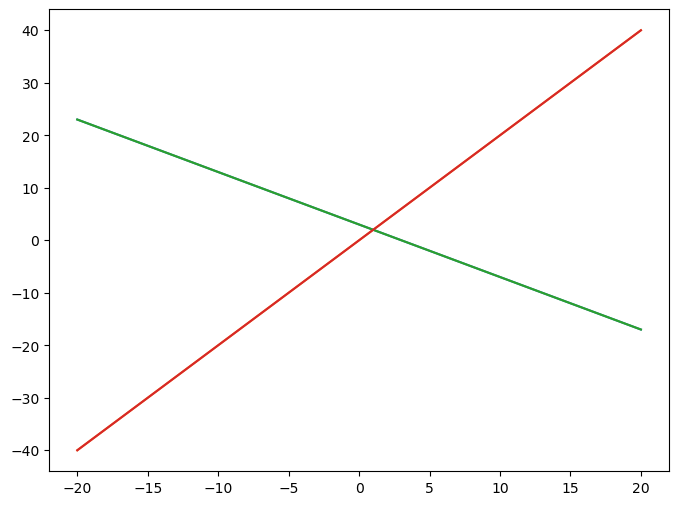

In [19]:
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

t = np.linspace(-20, 20, 40)
func1 = 3-t
func2 = 2*t

plt.figure(figsize = (8,6))
plt.plot(t,func1, label='y = x + y = 3')
plt.plot(t,func2, label='y = 2x')

plt.plot(t,func1)
plt.plot(t,func2)
plt.show()


#### 2.2 Infinitely many solutions example
In this example, the second equation is a multiple of the first.

In [ ]:
A2 = np.array([[1., 1.], [2., 2.]])
b2 = np.array([2., 4.])
rA2 = matrix_rank(A2)
rAug2 = matrix_rank(np.c_[A2, b2])
print('rank(A)=', rA2, ' rank([A|b])=', rAug2)
print('det(A)=', det(A2))

Exercise- 

Plot there two functions together in one plot: x + y = 2 & 2x + 2y = 4

C:\Users\Aaron\AppData\Local\Temp\ipykernel_23644\1916727251.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


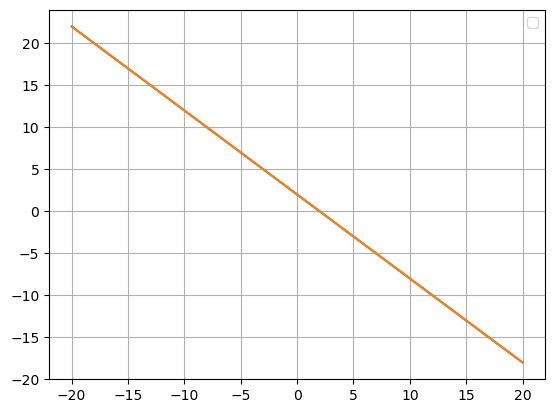

In [27]:
# Your code here
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

t = np.linspace(-20, 20, 40)
func1 = 2 - t
func2 = 2 - t

plt.grid(True)
plt.legend()

plt.plot(t,func1, label='x + y = 2')
plt.plot(t,func2, label='2x + 2y = 4')

plt.show()

#### 2.3 No solution example
Parallel lines (inconsistent).

In [ ]:
A3 = np.array([[1., 1.], [2., 2.]])
b3 = np.array([2., 5.])
rA3 = matrix_rank(A3)
rAug3 = matrix_rank(np.c_[A3, b3])
print('rank(A)=', rA3, ' rank([A|b])=', rAug3, ' => inconsistent')
print('det(A)=', det(A3))


Exercise-

Plot these two functions toghether in one plot: x + y = 2 & 2x + 2y = 5

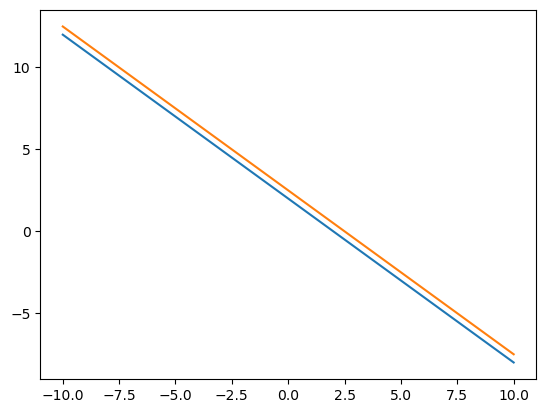

In [24]:
# Your code here
import numpy as np
from numpy.linalg import matrix_rank, det, solve, lstsq, inv
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True, precision=4)

t = np.linspace(-10, 10, 40)
func1 = 2 - t
func2 = (5 - 2*t)/2

plt.plot(t,func1, label='x + y = 2')
plt.plot(t,func2, label='2x + 2y = 5')


# B. Solving Systems of Linear Equations with Python
We will explore various methods for solving systems of linear equations using Python. We will cover

1. Solving systems using `numpy.linalg.solve` and matrix inversion
2. Gauss Elimination
3. Iterative methods like Gauss-Seidel
4. Least squares method

## 1. Types of Solutions to Linear Systems
- Unique solution
- Infinite solutions
- No solution
- Geometric interpretation
- Role of rank and determinant

### Geometric interpretation in 2D
- Unique solution: two lines intersect at one point.
- Infinite solutions: coincident lines.
- No solution: parallel, distinct lines.

## 2. Direct Methods
### a. Using `np.linalg.solve`
When 1.)The coefficient matrix A is square (same number of equations as unknowns). 2.) The matrix A is full rank (i.e., its determinant is non-zero).

Don't use when 1.) The matrix is not square. 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

In [28]:
import numpy as np
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print("A=", A)
print("b=", b)
print("Augmented Matrix [A|b] =\n", np.c_[A, b])
print('rank(A)=', matrix_rank(A), ' rank([A|b])=', matrix_rank(np.c_[A, b]))
print('det(A)=', det(A))
x = np.linalg.solve(A, b)
print("Solution:\n", x)

A= [[2 1]
 [1 3]]
b= [ 8 13]
Augmented Matrix [A|b] =
 [[ 2  1  8]
 [ 1  3 13]]
rank(A)= 2  rank([A|b])= 2
det(A)= 5.000000000000001
Solution:
 [2.2 3.6]


### b. Matrix Inversion
Determinant and invertibility (square systems)
If $\det(A) \neq 0$, then $A$ is invertible and the unique solution is $\mathbf{x}=A^{-1}\mathbf{b}$. If $\det(A)=0$, the system is either inconsistent or has infinitely many solutions.

In [29]:
A = np.array([[2, 1], [1, 3]])
b = np.array([8, 13])
print('det(A)=', det(A))

# Solve using inversion (A is square and invertible here) and show result
x = np.linalg.inv(A) @ b
print("Solution via inversion:", x)

det(A)= 5.000000000000001
Solution via inversion: [2.2 3.6]


## 3. Gaussian Elimination
Manual row operations to echelon form and back-substitution.
Below is a simple implementation with partial pivoting to reach (upper) row-echelon form and solve when a unique solution exists.

### Example-
Let's solve this system of equation:

2x + y - z = 8 

-3x - y + 2z = -11

-2x + y + 2z = -3


In [43]:
# Your code here for Gaussian elimination step by step
# Print out the augmented matrix at each step

import numpy as np
A = np.array([[2., 1., -1.], 
              [3., 3., 9.], 
              [3., 4., 2.]])
b = np.array([8., 0., -5.])

# Step 1: Initial Augmented Matrix
aug = np.c_[A, b]
print('Initial Augmented [A|b] =\n', aug)

# Step 2: Make pivot A[0][0] = 1
aug[0] = aug[0] / aug[0][0]
print(aug)

# Step 3: Eliminate A[1][0] using row 0
factor = aug[1, 0]
aug[1] = aug[1] - factor * aug[0]
print(aug)

# Step 4: Eliminate A[2][0] using row 0
factor = aug[2, 0]
aug[2] = aug[2] - factor * aug[0]
print(aug)
 
# Step 5: Make pivot A[1][1] = 1
aug[1] = aug[1] / aug[1, 1]
print(aug)

# Step 6: Eliminate A[2][1] using row 1
factor = aug[2, 1]
aug[2] = aug[2] - factor * aug[1]
print(aug)

# Step 7: Make pivot A[2][2] = 1
aug[2] = aug[2] / aug[2, 2]
print(aug)

# Step 8: Back substitution to get final solution
aug[1] = aug[1] - aug[1,2] * aug[2]
aug[0] = aug[0] - aug[0,2]  * aug[2]
aug[0] = aug[0] - aug[0,1]  * aug[1]
print(aug)

print(f'solution : {aug[:, -1]}')

Initial Augmented [A|b] =
 [[ 2.  1. -1.  8.]
 [ 3.  3.  9.  0.]
 [ 3.  4.  2. -5.]]
[[ 1.   0.5 -0.5  4. ]
 [ 3.   3.   9.   0. ]
 [ 3.   4.   2.  -5. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  3.    4.    2.   -5. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.5  10.5 -12. ]
 [  0.    2.5   3.5 -17. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    2.5   3.5 -17. ]]
[[  1.    0.5  -0.5   4. ]
 [  0.    1.    7.   -8. ]
 [  0.    0.  -14.    3. ]]
[[ 1.          0.5        -0.5         4.        ]
 [ 0.          1.          7.         -8.        ]
 [-0.         -0.          1.         -0.21428571]]
[[ 1.          0.          0.          7.14285714]
 [ 0.          1.          0.         -6.5       ]
 [-0.         -0.          1.         -0.21428571]]
solution : [ 7.14285714 -6.5        -0.21428571]


Exercise-

Use loops to do the foward elimination (i.e., make pivot and eliminate) and the back substitution for Gaussian Elimination. Draw a flow chart first. 

In [44]:
# Your code here

# Example augmented matrix [A|b]
A = np.array([[2.0, -1.0, 1.0],
              [3.0, 3.0, 9.0],
              [3.0, 3.0, 5.0]])

b = np.array([8.0, 0.0, -6.0])

# Combine A and b into an augmented matrix
n = len(b)
Ab = np.hstack([A, b.reshape(-1, 1)])

# --- Forward Elimination ---
for i in range(n):
    # Pivoting (swap rows if necessary)
    if Ab[i, i] == 0:
        for k in range(i+1, n):
            if Ab[k, i] != 0:
                Ab[[i, k]] = Ab[[k, i]]
                break

    # Eliminate entries below the pivot
    for j in range(i+1, n):
        factor = Ab[j, i] / Ab[i, i]
        Ab[j, i:] = Ab[j, i:] - factor * Ab[i, i:]

# --- Back Substitution ---
x = np.zeros(n)
for i in range(n-1, -1, -1):
    x[i] = (Ab[i, -1] - np.dot(Ab[i, i+1:n], x[i+1:n])) / Ab[i, i]

print("Solution:", x)


Solution: [ 0.66666667 -5.16666667  1.5       ]


## 4. Iterative Method- Gauss-Seidel 

 This method solves a system of linear equations iteratively and prints the updated solution vector at each iteration until convergence.

Example-

Let's solve this system of equation:

4x_0 - x_1         = 15 

-x_0 - 4x_1 - x_2  = 10
     
     - x_1  + 3x_2 = 10


In [45]:
import numpy as np

# Define the system of equations
A = np.array([[4.0, -1.0, 0.0],
              [-1.0, 4.0, -1.0],
              [0.0, -1.0, 3.0]])
b = np.array([15.0, 10.0, 10.0])

# Initial guess
x = np.zeros_like(b)

# Tolerance and maximum iterations
tol = 1e-6
max_iterations = 25
n = len(b)
print ("length of b array=", n)

print("Initial guess:", x)

for k in range(max_iterations):
    x_new = np.copy(x)
    print(f"Iteration {k+1}:")
    for i in range(n):
        s1 = sum(A[i][j] * x_new[j] for j in range(i))
        s2 = sum(A[i][j] * x[j] for j in range(i + 1, n))
        x_new[i] = (b[i] - s1 - s2) / A[i][i]
        print(f"x[{i}] = {x_new[i]}")

    # Check for convergence
    if np.allclose(x, x_new, atol=tol):
        print("Converged!")
        break
    x = x_new

print("Final solution:")
print(x)


length of b array= 3
Initial guess: [0. 0. 0.]
Iteration 1:
x[0] = 3.75
x[1] = 3.4375
x[2] = 4.479166666666667
Iteration 2:
x[0] = 4.609375
x[1] = 4.772135416666667
x[2] = 4.924045138888889
Iteration 3:
x[0] = 4.943033854166667
x[1] = 4.966769748263889
x[2] = 4.988923249421297
Iteration 4:
x[0] = 4.991692437065972
x[1] = 4.995153921621817
x[2] = 4.998384640540606
Iteration 5:
x[0] = 4.998788480405454
x[1] = 4.9992932802365155
x[2] = 4.999764426745505
Iteration 6:
x[0] = 4.999823320059129
x[1] = 4.999896936701158
x[2] = 4.999965645567053
Iteration 7:
x[0] = 4.99997423417529
x[1] = 4.999984969935586
x[2] = 4.9999949899785285
Iteration 8:
x[0] = 4.999996242483896
x[1] = 4.999997808115606
x[2] = 4.999999269371869
Converged!
Final solution:
[4.99997423 4.99998497 4.99999499]


Exercise- 
Draw the flowchart of the code above.

## 5 Least Squares Method 
(Optional for now. We will discuss more later.)


Using `np.linalg.lstsq` for least-squares solutions.
When 1.) The matrix is not square (more equations than unknowns). 2.)The matrix is singular (determinant is zero). 3.)The system has no solution or infinitely many solutions.

When a system of linear equations is **overdetermined** (more equations than unknowns), an exact solution may not exist. In such cases, we also use the **least squares method** to find an approximate solution that minimizes the residual error.

Notes
- `np.linalg.lstsq` returns the solution vector `x`, residuals, rank of matrix `A`, and singular values.
- The residuals indicate how close the solution comes to satisfying all equations.
- Least squares is widely used in **data fitting**, **regression**, and **signal processing**.

In [46]:
import numpy as np
A = np.array([[1., 1.], [1., 2.], [1, 3]])
b = np.array([1., 2., 2.])[:, None]
print('A =\n', A)
print('b =\n', b)
#print('det(A)=', det(A))
x, residuals, rank, s = lstsq(A, b, rcond=None)
print("Rank(A) =", rank)
print("Singular values of A =", s)
print('Least-squares solution x =', x)
print('Residual ||Ax-b|| =', residuals)

A =
 [[1. 1.]
 [1. 2.]
 [1. 3.]]
b =
 [[1.]
 [2.]
 [2.]]
Rank(A) = 2
Singular values of A = [4.07914333 0.60049122]
Least-squares solution x = [[0.66666667]
 [0.5       ]]
Residual ||Ax-b|| = [0.16666667]


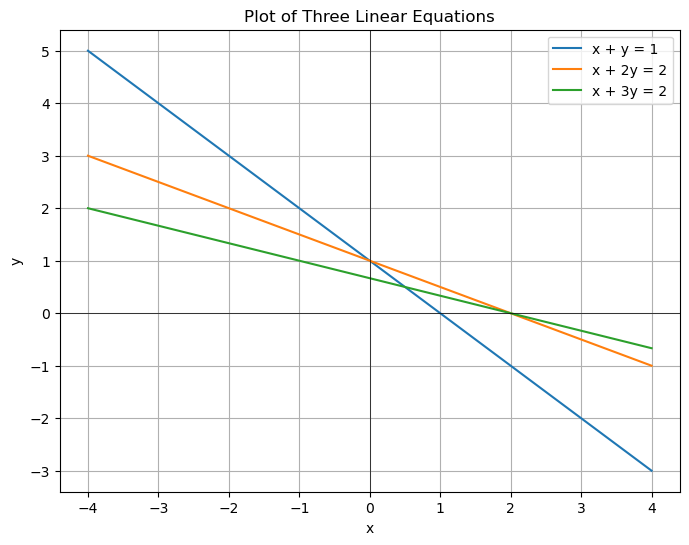

In [47]:
import numpy as np
import matplotlib.pyplot as plt

# Define x range
x = np.linspace(-4, 4, 50)

# Define the equations
y1 = 1 - x       # x + y = 1
y2 = (2 - x) / 2 # x + 2y = 2
y3 = (2 - x) / 3 # x + 3y = 2

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x, y1, label='x + y = 1')
plt.plot(x, y2, label='x + 2y = 2')
plt.plot(x, y3, label='x + 3y = 2')

# Add labels and legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Plot of Three Linear Equations')
plt.grid(True)
plt.legend()
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

# Show plot
plt.show()

## 6. Summary Table
| Method             | Type         | Pros                     | Cons                      |
|--------------------|--------------|--------------------------|---------------------------|
| `np.linalg.solve`  | Direct       | Fast, accurate           | Only for square systems   |
| Inversion          | Direct       | Conceptually simple      | Numerically unstable      |
| Gauss Elimination  | Manual       | Educational               | Tedious for large systems |
| Gauss-Seidel       | Iterative    | Good for sparse systems  | Needs convergence check   |
| Least Squares      | Overdetermined | Handles extra equations | Approximate solution      |


## Exercise Problem 1: 
Solve this system of equations using least squares method and plot the three line in one plot.
1. \(2x + y = 8\)
2. \(x + 3y = 13\)
3. \(x + y = 7\) *(Overdetermined)*



Least squares solution:
x = 2.400, y = 3.600


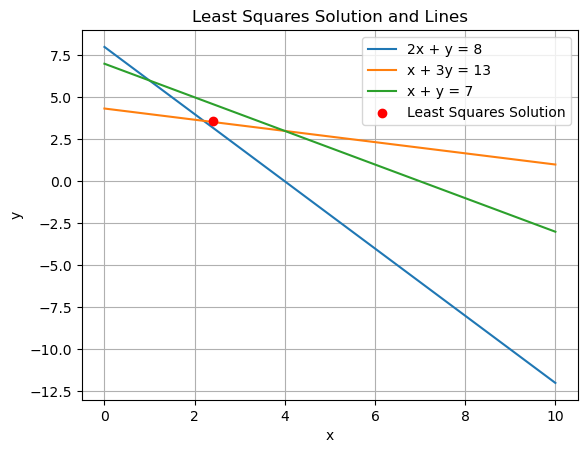

In [48]:
# Your code here
import numpy as np
import matplotlib.pyplot as plt

# Coefficients matrix A and constant vector b
A = np.array([[2, 1],
              [1, 3],
              [1, 1]])
b = np.array([8, 13, 7])

# Solve using least squares method
x, residuals, rank, s = np.linalg.lstsq(A, b, rcond=None)
print("Least squares solution:")
print(f"x = {x[0]:.3f}, y = {x[1]:.3f}")

# Plotting
x_vals = np.linspace(0, 10, 100)

# Equations for each line
y1 = 8 - 2*x_vals       # from 2x + y = 8
y2 = (13 - x_vals)/3    # from x + 3y = 13
y3 = 7 - x_vals         # from x + y = 7

# Plot lines
plt.plot(x_vals, y1, label='2x + y = 8')
plt.plot(x_vals, y2, label='x + 3y = 13')
plt.plot(x_vals, y3, label='x + y = 7')

# Plot least squares solution
plt.scatter(x[0], x[1], color='red', label='Least Squares Solution', zorder=5)

plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Squares Solution and Lines')
plt.legend()
plt.grid(True)
plt.show()


## Exercise Problem 2
Create a $3\times 3$ system with a unique solution. Verify using rank and determinant, then solve with `solve`.

In [55]:
# Your code here
import numpy as np
A = np.array([[2., 1., -1.]
              ,[3., 3., 9.],
              [3., 4., 2.]])

b = np.array([8., 0., -5.])
rankA = np.linalg.matrix_rank(A)
detA = np.linalg.det(A)

print(A)
print(f'Rank of A: {rankA}')
print(f'Determinant of A: {detA:.2f}')

solution = np.linalg.solve(A,b)
print(f'Solution: {solution}')





[[ 2.  1. -1.]
 [ 3.  3.  9.]
 [ 3.  4.  2.]]
Rank of A: 3
Determinant of A: -42.00
Solution: [ 7.14285714 -6.5        -0.21428571]


## Exercise Problem 3
Create an inconsistent system. Compute the least-squares solution and residual norm.

In [60]:
# Your code here
A2 = np.array([[1., 2., 1.], [2., 1., 3.], [3., 3., 4.]])
b2 = np.array([6., 15., 24.2])

aug = np.c_[A2, b2]
rankA = np.linalg.matrix_rank(A2)
rankAb = np.linalg.matrix_rank(aug)
print(aug)

if rankA < rankAb:
    print("The system is inconsistent; no solution exists.")

det_aug = np.linalg.det(A2)
print(det_aug)
solution_lstsq, residuals, rank, s = np.linalg.lstsq(A2, b2, rcond=None)
print(f'Least-squares solution: {solution_lstsq}')

solutionnormal = np.linalg.solve(A2, b2)
print(solutionnormal[0], solutionnormal[1], solutionnormal[2])






[[ 1.   2.   1.   6. ]
 [ 2.   1.   3.  15. ]
 [ 3.   3.   4.  24.2]]
The system is inconsistent; no solution exists.
7.77156117237606e-16
Least-squares solution: [2.2952381  0.56761905 3.63619048]
2.0587884010836548e+16 -4117576802167309.0 -1.2352730406501924e+16


## Exercise Problem 4
Use `gaussian_elimination_solve` to solve a new square system and verify the result with `solve`.

In [ ]:
# Your code here
A2 = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.]])
b2 = np.array([6., 15., 24.])
aug = np.c_[A2, b2]

import numpy as np

def gaussian_elimination_solve(A, b):

    A = np.array(A2, dtype=float)
    b = np.array(b2, dtype=float)
    
    n = len(b)
    
    aug = np.column_stack((A2, b2))
    
    
    for i in range(n):
        
        max_row = i + np.argmax(np.abs(aug[i:, i]))
        if max_row != i:
            aug[[i, max_row]] = aug[[max_row, i]]  # swap rows
        
        for j in range(i + 1, n):
            factor = aug[j, i] / aug[i, i]
            aug[j, i:] -= factor * aug[i, i:]
    
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        x[i] = (aug[i, -1] - np.dot(aug[i, i+1:n], x[i+1:])) / aug[i, i]
    
    return x

print("Solution:", gaussian_elimination_solve(A2, b2))
print("Verified Solution: ", np.linalg.solve(A2, b2))



Solution: [0. 3. 0.]
Verified Solution:  [-0.6  4.2 -0.6]
